<p style="text-align: center; font-size: 30px; font-weight: bold;">
    IBM HR Analytics Employee Attrition & Performance <br>
</p>

<p style="text-align: center; font-size: 24px; font-weight: bold;">
    Inteligencia Artificial y Aprendizaje Automático <br>
</p>
<p style="text-align: center; font-size: 20px; font-weight: bold;">
    Modelado, Balanceo e Importancia de Factores
</p>

#### Equipo 
- Agustín Jaime Aguilar Tapia 
- Karen Esthela Perez Tonches 
- A01183123 - Luis Miguel Vazquez Salazar 
- A01451661 - Jesus Isaias Tec Campos
- A01451684 - Miguel Angel Higuera Lopez

# **Objetivo**

La rotación de personal es uno de los problemas que afecta actualmente a muchas empresas y organizaciones, grandes o pequeñas. En esta actividad usaremos una base de datos generada por IBM para estudiar cómo enfrentar dicho problema.

Data link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Librerias

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
pd.set_option('display.max_columns', None)

# PARTE 1: Análisis descriptivo y preprocesamiento de los datos

### 1) Introducción al Problema de Rotación de Personal:

>La rotación de personal se refiere a la tasa de empleados que dejan una organización en un período de tiempo dado. Es un problema significativo ya que puede tener impactos negativos en la productividad, la moral de los empleados y los costos asociados con la contratación y capacitación de nuevos empleados. Las principales problemáticas incluyen la pérdida de conocimientos y experiencia, la interrupción en la continuidad del trabajo y la carga financiera de reemplazar y capacitar a nuevos empleados.

### 2) Carga de la Base de Datos y Partición de los Datos

In [3]:
# Cargar los datos
data_path = 'https://raw.githubusercontent.com/luisovillista/IA/main/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(data_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Revisión para saber si hay nulos en el dataset

In [4]:
#se validan que no existen nulos en la base
# Calcula la suma de valores nulos por columna
null_counts = df.isnull().sum()

# Filtra las columnas con valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Verifica si hay columnas con valores nulos
if not columns_with_nulls.empty:
    print(columns_with_nulls)
else:
    print("Sin Nulos")

Sin Nulos


**Partición de datos**

In [5]:
# Separar las variables de entrada (X) y salida (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Convertir la variable 'Attrition' a numérica para la estratificación
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos en conjuntos de entrenamiento, validación y prueba
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=42, stratify=ytemp)


**a) Dimensión de los Conjuntos de Datos**

In [6]:
# [Nota: Estas líneas de código simplemente reportan las dimensiones de los conjuntos y no las modifican]
print("Dimensiones del conjunto de entrenamiento:", Xtrain.shape)
print("Dimensiones del conjunto de validación:", Xval.shape)
print("Dimensiones del conjunto de prueba:", Xtest.shape)


Dimensiones del conjunto de entrenamiento: (1029, 34)
Dimensiones del conjunto de validación: (220, 34)
Dimensiones del conjunto de prueba: (221, 34)


**b) Análisis Inicial de Todas las Variables y Eliminación de Variables No Informativas**

<ipython-input-7-6054ab845346>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Xtrain.corr().abs()


<Axes: >

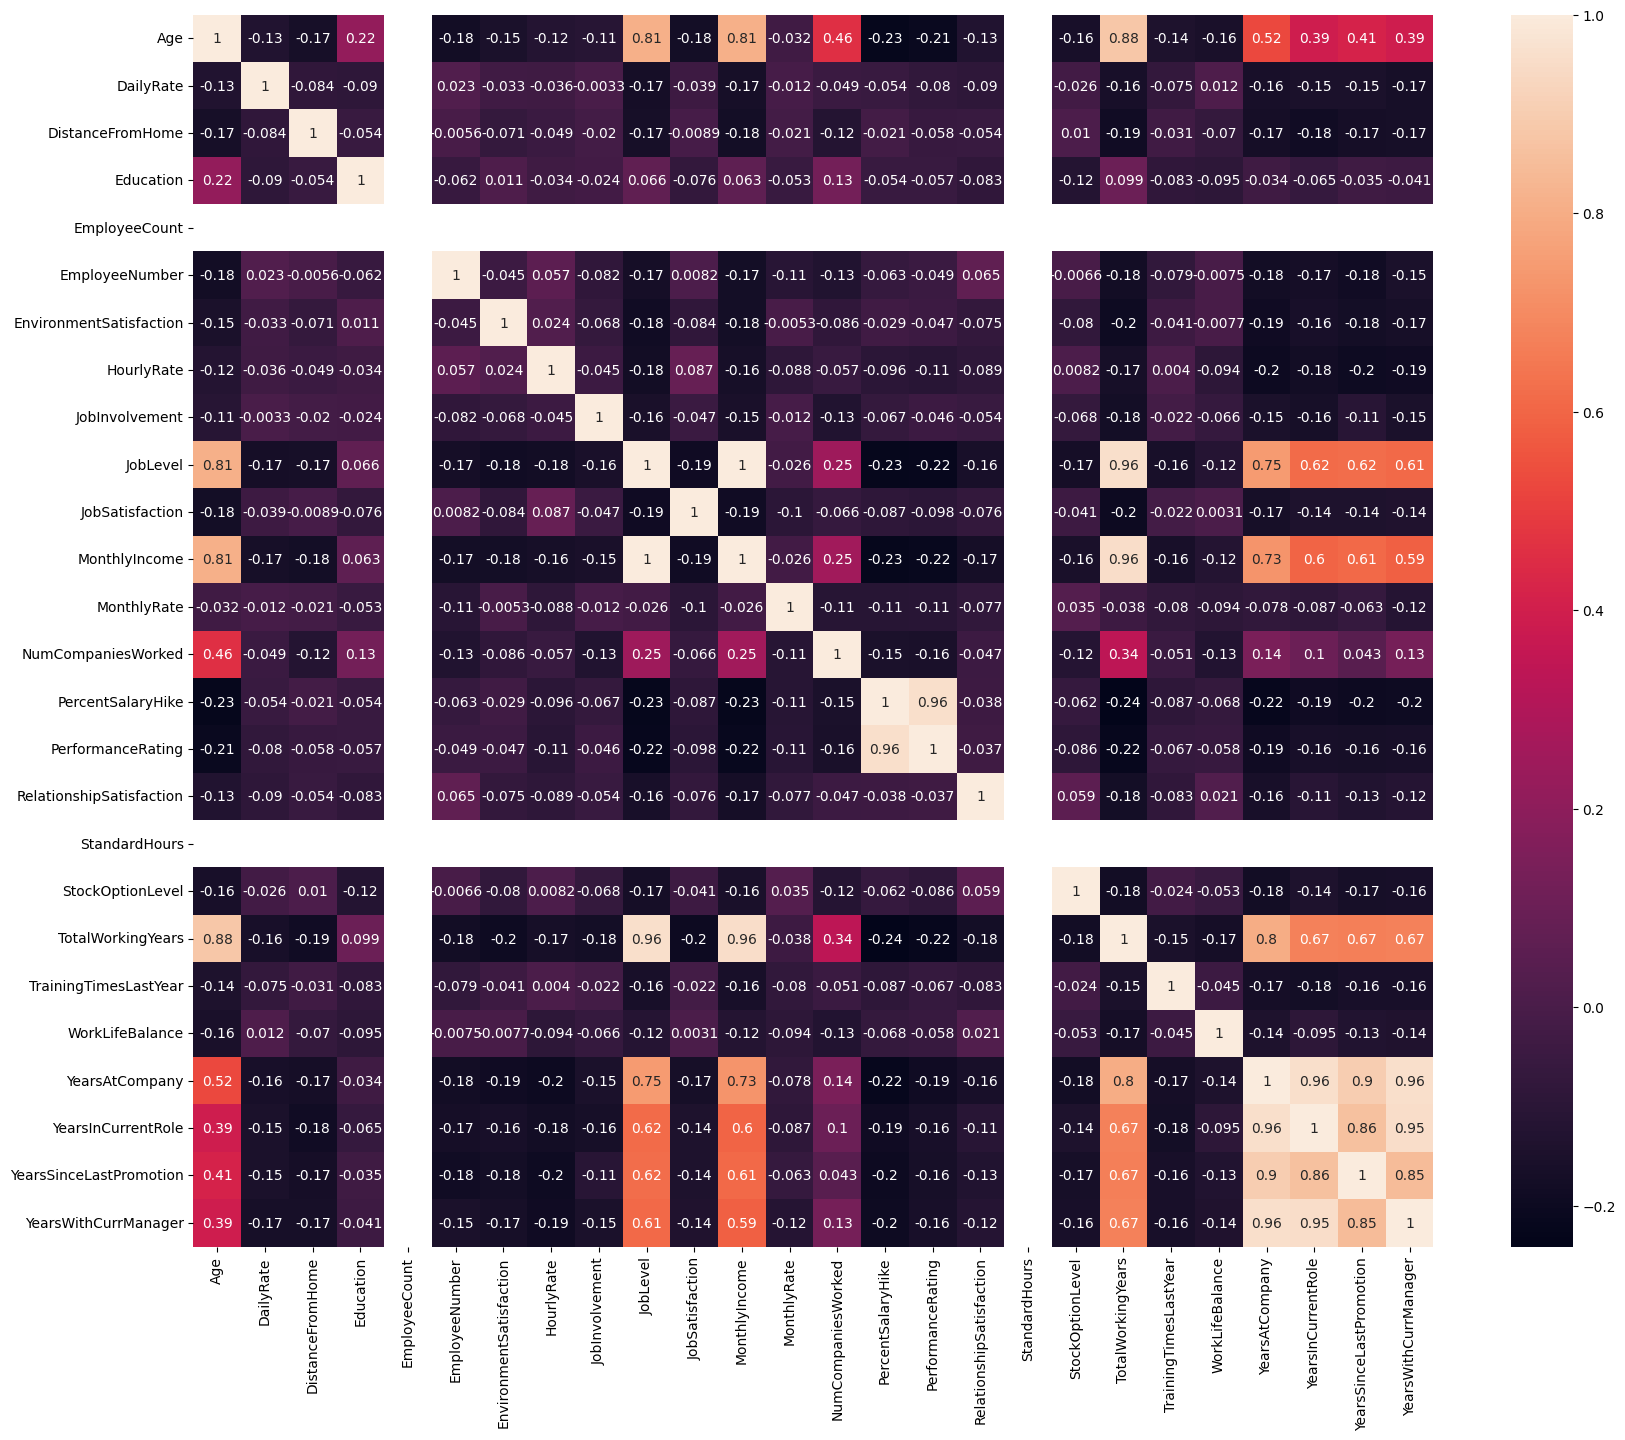

In [7]:
# Heatmap para identificar las variables con poca o baja correlación
corr_matrix = Xtrain.corr().abs()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix.corr(),
            fmt='.2g', annot=True
           )

In [8]:
# Identificación de variables con poca variabilidad
low_variability_columns = Xtrain.columns[Xtrain.nunique() <= 1]
low_variability_columns

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [9]:
# Identificación de variables altamente correlacionadas
highly_correlated = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated_columns = [column for column in highly_correlated.columns if any(highly_correlated[column] > 0.8)]
highly_correlated_columns

['MonthlyIncome']

In [10]:
manual_columns = ['EmployeeNumber','EmployeeCount','StandardHours','EmployeeCount','Over18']

In [11]:
# Combinar las listas de columnas a eliminar
columns_to_drop = list(set(low_variability_columns.to_list() + highly_correlated_columns + manual_columns))

# Eliminación de variables no informativas
Xtrain_dropped = Xtrain.drop(columns=columns_to_drop)
Xval_dropped = Xval.drop(columns=columns_to_drop)
Xtest_dropped = Xtest.drop(columns=columns_to_drop)

#### Variables eliminadas.
>En resumen, hemos eliminado las columnas que tienen muy poca correlación las cuales son: EmployeeCount', 'Over18', 'StandardHours', adicionalmente se ha eliminado la variable 'MonthlyIncome' debido su alta correlación lo cual puede provocar multicolinealidad lo cual puede afectar negativamente la interpretación de los coeficientes y la estabilidad del modelo, finalmente hemos eliminado columnas que identificamos manualmente y que no están aportando información al problema tal como 'EmployeeNumber','EmployeeCount','StandardHours

***c) Análisis y Transformaciones para Datos de Tipo Numérico***

In [12]:
# Identificación de variables numéricas
numeric_columns = Xtrain_dropped.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [13]:
# Estandarización de variables numéricas
scaler = StandardScaler()
Xtrain_dropped[numeric_columns] = scaler.fit_transform(Xtrain_dropped[numeric_columns])
Xval_dropped[numeric_columns] = scaler.transform(Xval_dropped[numeric_columns])
Xtest_dropped[numeric_columns] = scaler.transform(Xtest_dropped[numeric_columns])

>Se identificaron las variables numéricas y se aplicó la estandarizaciónpara asegurar que las variables estén en una escala consistente, se aplicó la estandarización a las variables numéricas utilizando la técnica de StandardScaler. La estandarización transforma las variables para que tengan una media de 0 y una desviación estándar de 1.

**d) Análisis y Transformaciones para Datos de Tipo Categórico Binario**

In [14]:
#Identificación de columnas con datos categóricos Binarios.
binary_categorical_columns = [col for col in Xtrain_dropped.columns if Xtrain_dropped[col].nunique() == 2 and Xtrain_dropped[col].dtype == 'object']
binary_categorical_columns

['Gender', 'OverTime']

In [15]:
# Aplicar LabelEncoder a columnas categóricas binarias
le = LabelEncoder()
for col in binary_categorical_columns:
    Xtrain_dropped[col] = le.fit_transform(Xtrain_dropped[col])
    Xval_dropped[col] = le.transform(Xval_dropped[col])
    Xtest_dropped[col] = le.transform(Xtest_dropped[col])

# Asegurar que todos los conjuntos tengan las mismas columnas
Xval_dropped = Xval_dropped.reindex(columns=Xtrain_dropped.columns, fill_value=0)
Xtest_dropped = Xtest_dropped.reindex(columns=Xtrain_dropped.columns, fill_value=0)

> Se identificaron las columnas categóricas binarias Gender y Overtime y se aplicó la transformación LabelEncoder.

**e) Análisis y Transformaciones para Datos de Tipo Categórico Nominal**

In [16]:
#Identificación de columnas con datos categóricos Nominal.
nominal_categorical_columns = [col for col in Xtrain_dropped.columns if Xtrain_dropped[col].nunique() > 1 and Xtrain_dropped[col].dtype == 'object']
nominal_categorical_columns

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [17]:
# Transformación de variables categóricas nominales con get_dummies
Xtrain_dropped = pd.get_dummies(Xtrain_dropped, columns=nominal_categorical_columns, drop_first=True)
Xval_dropped = pd.get_dummies(Xval_dropped, columns=nominal_categorical_columns, drop_first=True)
Xtest_dropped = pd.get_dummies(Xtest_dropped, columns=nominal_categorical_columns, drop_first=True)

# Asegurar que todos los conjuntos tengan las mismas columnas
Xval_dropped = Xval_dropped.reindex(columns=Xtrain_dropped.columns, fill_value=0)
Xtest_dropped = Xtest_dropped.reindex(columns=Xtrain_dropped.columns, fill_value=0)

> Se identificaron las columnas de tipo categórico nominal y se aplicó la transformación get_dummies()

**f) Análisis y Transformaciones para Datos de Tipo Categórico Ordinales**
>No se encontraron datos de tipo categórico Ordinales

# PARTE 2: Análisis Exploratorio entre Factores

### 3) Relaciones entre los factores y la variable de salida “Attrition”

In [18]:
# Preparar los datos para las visualizaciones
data_visualization = Xtrain_dropped.copy()
data_visualization['Attrition'] = le.inverse_transform(ytrain)

a) Relación entre "Age" y "Attrition"

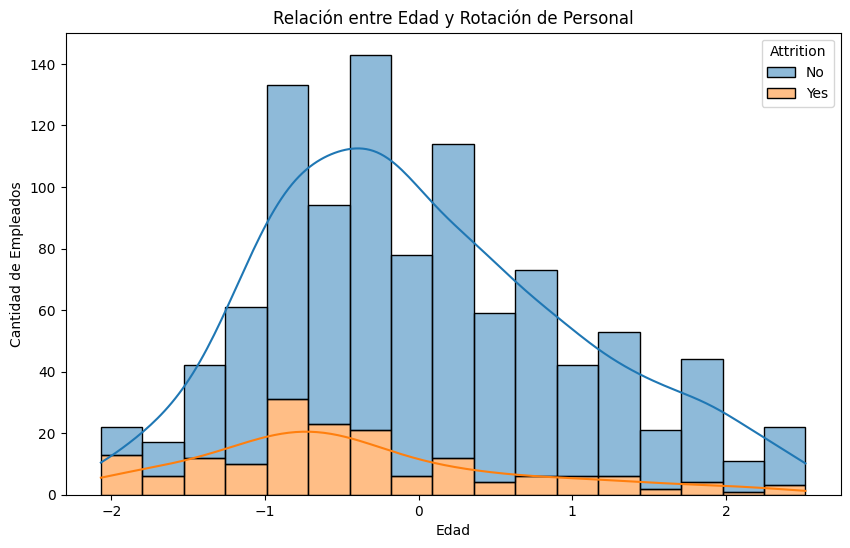

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_visualization, x='Age', hue='Attrition', multiple="stack", kde=True)
plt.title("Relación entre Edad y Rotación de Personal")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Empleados")
plt.show()

**b) Relación entre "Department" y "Attrition"**

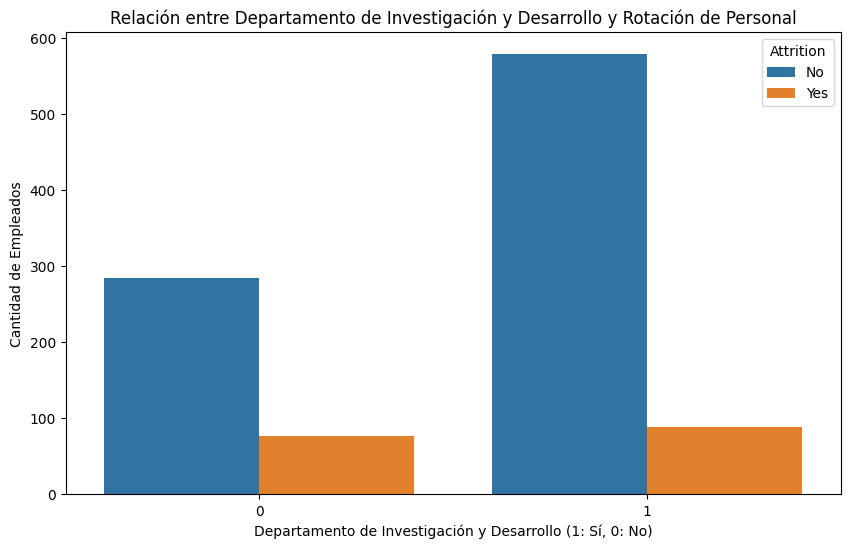

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_visualization, x='Department_Research & Development', hue='Attrition')
plt.title("Relación entre Departamento de Investigación y Desarrollo y Rotación de Personal")
plt.xlabel("Departamento de Investigación y Desarrollo (1: Sí, 0: No)")
plt.ylabel("Cantidad de Empleados")
plt.show()

**c) Relación entre "Gender" y "Attrition"**

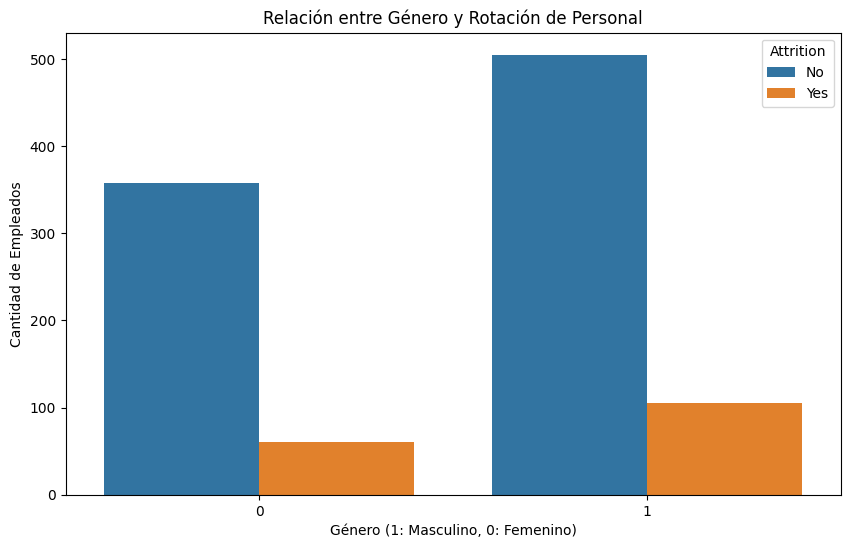

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_visualization, x='Gender', hue='Attrition')
plt.title("Relación entre Género y Rotación de Personal")
plt.xlabel("Género (1: Masculino, 0: Femenino)")
plt.ylabel("Cantidad de Empleados")
plt.show()

**d) Incluir Otras Relaciones Relevantes**

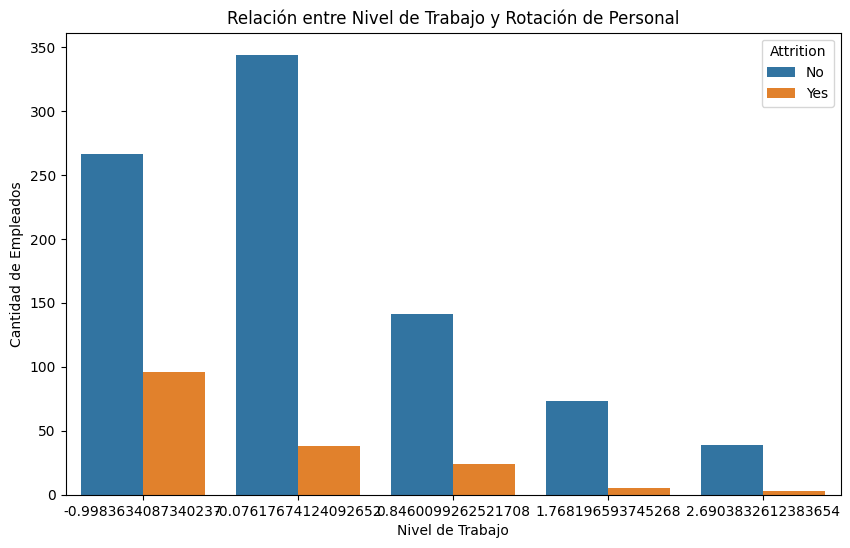

In [22]:
# Ejemplo: Relación entre "JobLevel" y "Attrition"
plt.figure(figsize=(10, 6))
sns.countplot(data=data_visualization, x='JobLevel', hue='Attrition')
plt.title("Relación entre Nivel de Trabajo y Rotación de Personal")
plt.xlabel("Nivel de Trabajo")
plt.ylabel("Cantidad de Empleados")
plt.show()

**e) Conclusiones Basadas en los Gráficos**

>**a) Edad y Rotación de Personal:** Se observa una distribución que sugiere que la rotación es más frecuente en empleados más jóvenes. A medida que aumenta la edad, la proporción de empleados que dejan la organización parece disminuir.

>**b) Departamento de Investigación y Desarrollo y Rotación de Personal:** Aquí se muestra la rotación en función de si el empleado pertenece o no al Departamento de Investigación y Desarrollo. Hay una notable diferencia en la rotación entre aquellos que están y no están en este departamento.

>**c) Género y Rotación de Personal:** El gráfico indica diferencias en la rotación entre géneros, lo que podría sugerir un patrón o influencia del género en la decisión de dejar la empresa.

>**d) Nivel de Trabajo y Rotación de Personal:** Se muestra la rotación en función del nivel de trabajo del empleado. Los niveles más bajos parecen tener una mayor tasa de rotación.

>**Conclusiones del Análisis Exploratorio**
Estos gráficos sugieren que factores como la edad, el departamento, el género y el nivel de trabajo pueden estar correlacionados con la rotación de personal. En particular, parece haber una mayor tendencia a la rotación entre los empleados más jóvenes, en ciertos departamentos, y en niveles de trabajo más bajos.

# PARTE 3: Modelado

### 4. Modelo de Regresión Logística

In [23]:
# Entrenamiento del modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(Xtrain_dropped, ytrain)

# Predicciones en los conjuntos de entrenamiento y validación
ytrain_pred = log_reg.predict(Xtrain_dropped)
yval_pred = log_reg.predict(Xval_dropped)

# Exactitud (accuracy) en los conjuntos de entrenamiento y validación
accuracy_train = accuracy_score(ytrain, ytrain_pred)
accuracy_val = accuracy_score(yval, yval_pred)

# Matriz de confusión y reporte de clasificación en el conjunto de validación
conf_matrix = confusion_matrix(yval, yval_pred)
class_report = classification_report(yval, yval_pred)

#accuracy_train, accuracy_val, conf_matrix, class_report


**a) Despliegue de valores de exactitud**

In [24]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(accuracy_train))
print('Precisión en el set de Test: {:.2f}'
     .format(accuracy_val))

Precisión en el set de Entrenamiento: 0.90
Precisión en el set de Test: 0.89


**b) Despliegue del reporte y matriz de confusión.**

In [25]:
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       185
           1       0.81      0.37      0.51        35

    accuracy                           0.89       220
   macro avg       0.85      0.68      0.72       220
weighted avg       0.88      0.89      0.87       220



<Figure size 900x900 with 0 Axes>

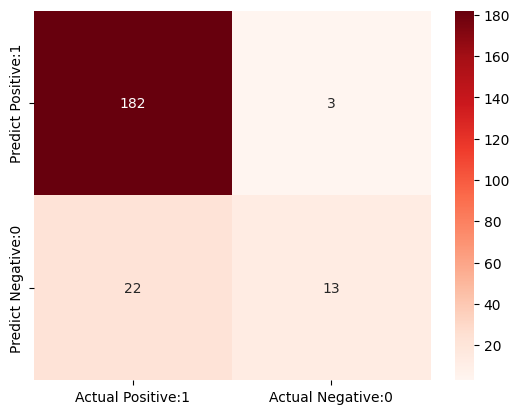

<Figure size 900x900 with 0 Axes>

In [26]:
cm_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

**c) ¿Con base a los resultados, el modelo modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)?**
> La precisión en el set de entrenamiento y validaciones es bastante alta sin llegar a estar sobre entrenado, 90% es un número muy bueno, por lo tanto el modelo no está subentrenado ni sobreentrenado

**d) ¿Consideras que tenemos un problema desbalanceado?**
> Sí, consideramos que los datos están desbalanceados porque al analizar el reporte de clasificación podemos ver que en la métrica de support la clase 0 tiene 185 ejemplos, mientras que la clase 1 tiene solo 35 ejemplos, además de que el recall es bajo para la clase 1,lo cual indica que el modelo tiene dificultades para identificar correctamente los casos positivos de la clase minoritaria.

**e) Interpreta el valor numérico de la “precisión” de la clase positiva en el contexto del
problema de rotación de personal**
> El reporte muestra una presición del 81%, este valor se refiere a la capacidad del modelo para predecir correctamente los casos de rotación de personal, es decir, tomando como base todos los casos que el modelo predijo como positivos (sumando los verdaderos positivos y los falsos positivos), qué porcentaje de esas predicciones positivas son verdaderamente positivas (verdaderos positivos). Tomando como referencia el ejercicio podemos decir que alrededor del 81% de los empleados que el modelo predice como casos de rotación de personal realmente abandonaron la empresa.

**f) Interpreta el valor numérico del “recall” de la clase positiva en el contexto del problema.**
> Tenemos un recall de 37%, este número significa que el modelo solo identifica correctamente alrededor del 37% de todos los empleados que realmente abandonaron la empresa, es decir esta métrica ayuda a saber de todos los casos positivos reales en el dataset, cuantos el modelo logró identificar correctamente, en este caso el valor es bajo, lo cual indica que el modelo tiene dificultades para identificar todos los casos reales de rotación de personal y tiende a perder algunos de ellos.

**g) ¿cuál de las métricas, “precision” o “recall” consideras que es más importante disminuir su valor?**
> Bajo el contexto del problema, lo que estamos buscando es poder reducir la rotación de personal por el alto impacto que tiene en la organización, por lo tanto consideramos que enfocarnos en recall sería la mejor estrategia, porque al un alto "recall" significa que el modelo identificará la mayoría de los empleados que están en riesgo de abandonar la empresa, lo que permite la toma de medidas preventivas.

### 5. Entrenamiento y Evaluación del Modelo kNN

In [27]:
# Entrenamiento del modelo kNN
knn = KNeighborsClassifier()
knn.fit(Xtrain_dropped, ytrain)

# Predicciones en los conjuntos de entrenamiento y validación
ytrain_pred_knn = knn.predict(Xtrain_dropped)
yval_pred_knn = knn.predict(Xval_dropped)

# Exactitud (accuracy) en los conjuntos de entrenamiento y validación
accuracy_train_knn = accuracy_score(ytrain, ytrain_pred_knn)
accuracy_val_knn = accuracy_score(yval, yval_pred_knn)

# Matriz de confusión y reporte de clasificación en el conjunto de validación
conf_matrix_knn = confusion_matrix(yval, yval_pred_knn)
class_report_knn = classification_report(yval, yval_pred_knn)

#accuracy_train_knn, accuracy_val_knn, conf_matrix_knn, class_report_knn

**a) Despliegue de valores de exactitud**

In [28]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(accuracy_train_knn))
print('Precisión en el set de Test: {:.2f}'
     .format(accuracy_val_knn))

Precisión en el set de Entrenamiento: 0.88
Precisión en el set de Test: 0.84


**b) Despliegue del reporte y matriz de confusión.**

In [29]:
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       185
           1       0.50      0.06      0.10        35

    accuracy                           0.84       220
   macro avg       0.67      0.52      0.51       220
weighted avg       0.79      0.84      0.78       220



<Figure size 900x900 with 0 Axes>

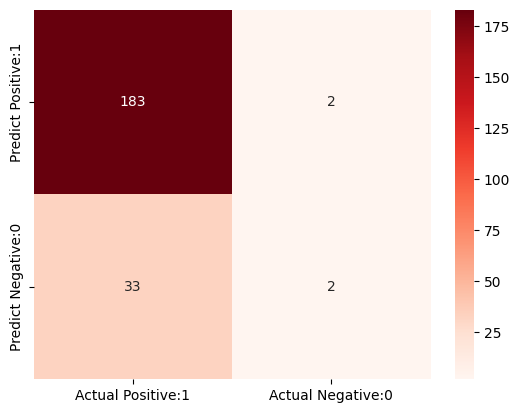

<Figure size 900x900 with 0 Axes>

In [30]:
cm_matrix_knn = pd.DataFrame(data=conf_matrix_knn, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_knn, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

**c) ¿Con base a los resultados, el modelo modelo está subentrenado (underfitting)? ¿o sobreentrenado (overfitting)?**
> La exactitud más baja en el conjunto de validación comparada con el de entrenamiento sugiere una ligera tendencia al sobreentrenamiento en el modelo kNN.

**d) Interpreta el valor numérico de la “precisión” de la clase positiva.**
> Desafortunadamente, con una precisión del 50%, podemos decir que este modelo es igual de efectivo que una moneda al aire cuando se trata de clasificar los empleados que se van de la empresa, con una precisión del 50%  para al clase positiva, nuestro modelo es incapaz de identificar a los empleados que terminan dejando la empresa con los parametros que le fueron asignados.

**e) Interpreta el valor numérico del “recall” de la clase positiva.**
> Nuestro modelo tiene un procentaje de recall del 6%, es decir, nuestro modelo es practicamente ciego para identificar los casos de empelados que verdadermente se fueron de la empresa, un recall asi de bajo solo nos indica que el modelo recupera 6 de cada 100 casos de salida, considerando que tiene una precisión del 50%, el modelo clasifica correctamente unicamente 3 de esos 6 empleados que encontró, como casos de salida.

**f) Compara los resultados con los del modelo de Regresión Logística y escribe tus conclusiones.**
> El modelo de regresión logística tiene un mejor desempeño en términos de exactitud y equilibrio entre precisión y recall para ambas clases.

>El modelo kNN muestra una precisión significativamente más baja para la clase 1 y un recall extremadamente bajo, lo que indica que no es tan efectivo como el modelo de regresión logística para este problema específico.

# PARTE 4: Balanceo de Clases y Comparación de Modelos

### 6) Modelo de Regresión Logística con Ponderación de Clases

In [31]:
# a) Entrenamiento del modelo de regresión logística con ponderación de clases
log_reg_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_weighted.fit(Xtrain_dropped, ytrain)

# Predicciones en los conjuntos de entrenamiento y validación
ytrain_pred_weighted = log_reg_weighted.predict(Xtrain_dropped)
yval_pred_weighted = log_reg_weighted.predict(Xval_dropped)

# Exactitud (accuracy) en los conjuntos de entrenamiento y validación
accuracy_train_weighted = accuracy_score(ytrain, ytrain_pred_weighted)
accuracy_val_weighted = accuracy_score(yval, yval_pred_weighted)

# b) Matriz de confusión y reporte de clasificación en el conjunto de validación
conf_matrix_weighted = confusion_matrix(yval, yval_pred_weighted)
class_report_weighted = classification_report(yval, yval_pred_weighted)

#accuracy_train_weighted, accuracy_val_weighted, conf_matrix_weighted, class_report_weighted


**a) Despliegue de valores de exactitud**

In [32]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(accuracy_train_weighted))
print('Precisión en el set de Test: {:.2f}'
     .format(accuracy_val_weighted))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.80


**b) Despliegue del reporte y matriz de confusión.**

In [33]:
print(class_report_weighted)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       185
           1       0.41      0.69      0.52        35

    accuracy                           0.80       220
   macro avg       0.67      0.75      0.69       220
weighted avg       0.85      0.80      0.81       220



<Figure size 900x900 with 0 Axes>

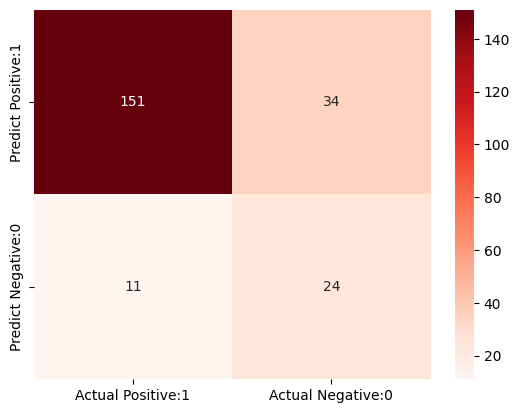

<Figure size 900x900 with 0 Axes>

In [34]:
cm_matrix_weighted = pd.DataFrame(data=conf_matrix_weighted, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_weighted, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

**C) Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

>Interpretación de los Resultados

>**Desempeño General:** El modelo muestra una disminución en la precisión para la clase 0 y un aumento significativo en el recall para la clase 1, lo que indica una mejor capacidad para identificar casos reales de rotación.

>**Balance entre Precision y Recall:** La ponderación de clases ha mejorado el balance entre precision y recall para la clase 1, aunque a costa de una disminución en la precisión.

### 7) SMOTE

In [35]:
# Crear un pipeline con SMOTE y regresión logística
pipeline_smote = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenamiento del modelo con SMOTE
pipeline_smote.fit(Xtrain_dropped, ytrain)

# Predicciones en los conjuntos de entrenamiento y validación
ytrain_pred_smote = pipeline_smote.predict(Xtrain_dropped)
yval_pred_smote = pipeline_smote.predict(Xval_dropped)

# Exactitud (accuracy) en los conjuntos de entrenamiento y validación
accuracy_train_smote = accuracy_score(ytrain, ytrain_pred_smote)
accuracy_val_smote = accuracy_score(yval, yval_pred_smote)

# Matriz de confusión y reporte de clasificación en el conjunto de validación
conf_matrix_smote = confusion_matrix(yval, yval_pred_smote)
class_report_smote = classification_report(yval, yval_pred_smote)

#accuracy_train_smote, accuracy_val_smote, conf_matrix_smote, class_report_smote


**a) Despliegue de valores de exactitud**

In [36]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(accuracy_train_smote))
print('Precisión en el set de Test: {:.2f}'
     .format(accuracy_val_smote))

Precisión en el set de Entrenamiento: 0.86
Precisión en el set de Test: 0.83


**b) Despliegue del reporte y matriz de confusión.**

In [37]:
print(class_report_smote)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       185
           1       0.46      0.46      0.46        35

    accuracy                           0.83       220
   macro avg       0.68      0.68      0.68       220
weighted avg       0.83      0.83      0.83       220



<Figure size 900x900 with 0 Axes>

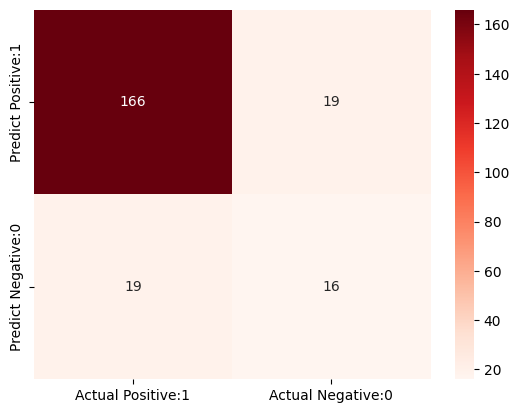

<Figure size 900x900 with 0 Axes>

In [38]:
cm_matrix_smote = pd.DataFrame(data=conf_matrix_smote, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_smote, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

**C) Compara los resultados con los modelos anteriores y escribe tus conclusiones.**

> Creemos que el modelo SMOTE es un mejor modelo, aunque es ligeramnete inferior en el recall de la clase positiva, notamos, usando lamatriz de confusion, que comete menos errores en general, considerando a la clase cero. Aunque no es muy sifgnificativa la mejora del modelo como para poder llevarlo a producción.

**8) Aplica alguno de los modelos combinados de sub y sobre entrenamiento**

In [39]:
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.pipeline import Pipeline


# Crear el objeto SMOTETomek para combinar el sobre y submuestreo
smote_tomek = SMOTETomek(random_state=42)

# Crear el modelo de regresión logística con los parámetros deseados
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Crear el pipeline con SMOTETomek y el modelo de regresión logística
pipeline = Pipeline([
    ('smote_tomek', smote_tomek),
    ('logistic_model', logistic_model)
])

# Entrenar el modelo usando el conjunto de entrenamiento
pipeline.fit(Xtrain_dropped, ytrain)

# Hacer predicciones en el conjunto de entrenamiento y validación
ytrain_pred = pipeline.predict(Xtrain_dropped)
yval_pred = pipeline.predict(Xval_dropped)

# Calcular la exactitud en los conjuntos de entrenamiento y validación
accuracy_train = accuracy_score(ytrain, ytrain_pred)
accuracy_val = accuracy_score(yval, yval_pred)

# Imprimir las métricas de rendimiento
print('Precisión en el set de Entrenamiento: {:.2f}'.format(accuracy_train))
print('Precisión en el set de Validación: {:.2f}'.format(accuracy_val))

# Generar y mostrar la matriz de confusión y el reporte de clasificación
conf_matrix = confusion_matrix(yval, yval_pred)
class_report = classification_report(yval, yval_pred)

print('Matriz de Confusión:\n', conf_matrix)
print('Reporte de Clasificación:\n', class_report)


Precisión en el set de Entrenamiento: 0.86
Precisión en el set de Validación: 0.83
Matriz de Confusión:
 [[166  19]
 [ 19  16]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       185
           1       0.46      0.46      0.46        35

    accuracy                           0.83       220
   macro avg       0.68      0.68      0.68       220
weighted avg       0.83      0.83      0.83       220



Entre los modelos discutidos, el que utilizó la combinación de sobremuestreo con SMOTE y submuestreo mediante ENN (SMOTETomek), seguido por un clasificador de regresión logística, presentó un equilibrio interesante en términos de precisión, recall y f1-score para la clase minoritaria (rotación de personal). Los resultados obtenidos con este modelo fueron:

- Precisión en el conjunto de entrenamiento: **86%**
- Precisión en el conjunto de validación: **83%**
- Matriz de Confusión en el conjunto de validación: **166 verdaderos negativos, 19 falsos positivos, 19 falsos negativos, 16 verdaderos positivos.**
- Reporte de Clasificación para el conjunto de validación:
  - Precisión para la clase no rotación (0): **0.90**
  - Precisión para la clase rotación (1): **0.46**
  - Recall para la clase rotación (1): **0.46**
  - F1-score para la clase rotación (1): **0.46**

**Comparación con Modelos Anteriores:**

1. **Modelo de Regresión Logística sin Técnicas de Balanceo:**
   - Este modelo mostró una alta precisión general, pero su capacidad para identificar correctamente la rotación de personal (clase minoritaria) fue limitada, como se evidencia en un recall más bajo para esa clase.

2. **Modelo kNN (K-Nearest Neighbors):**
   - Presentó una precisión general menor en comparación con la regresión logística y tuvo dificultades significativas para clasificar correctamente los casos de rotación, reflejado en un bajo recall y f1-score para la clase de rotación.

3. **Regresión Logística con Ponderación de Clases:**
   - Mejoró la identificación de casos de rotación a través de un mayor recall para la clase minoritaria, pero esto también resultó en una disminución de la precisión general y un aumento de los falsos positivos.

4. **Modelo con SMOTETomek:**
   - Logró un buen equilibrio entre detectar casos de rotación (mejorando el recall para la clase minoritaria) y mantener una precisión general alta. Este modelo ofreció una mejora notable en el tratamiento del desequilibrio de clases sin sacrificar demasiado la precisión global.

**Conclusiones:**

El modelo combinado de SMOTETomek y regresión logística se destaca como el enfoque más equilibrado para abordar el problema de predicción de rotación de personal. Este modelo no solo mantiene una alta precisión general sino que también mejora significativamente la capacidad de identificar casos de rotación, un aspecto crucial para aplicaciones prácticas en la gestión de recursos humanos.

El uso de técnicas de balanceo de clases como SMOTETomek muestra su valor al mejorar la detección de la clase minoritaria, lo cual es esencial en problemas con desequilibrios significativos de clases. Sin embargo, aún hay espacio para la mejora, especialmente en aumentar la precisión y el recall para la clase de rotación. Experimentar con diferentes algoritmos de clasificación, ajustes de parámetros y técnicas de ingeniería de características podría proporcionar mejoras adicionales.

En resumen, este análisis subraya la importancia de seleccionar y afinar cuidadosamente las técnicas de preprocesamiento y modelado en función de las características específicas del conjunto de datos y los objetivos del análisis, especialmente en contextos desafiantes como la predicción de rotación de personal en conjuntos de datos desbalanceados.

# PARTE 5: La importancia de los factores

### 9) Importancia de Factores en la Regresión Logística

In [40]:
# Suponiendo que Xtrain_dropped, Xval_dropped, ytrain y yval ya están definidos y preparados
Xtrain_augmented = pd.concat([Xtrain_dropped, Xval_dropped])
ytrain_augmented = np.concatenate([ytrain, yval])

In [41]:
log_reg_final = LogisticRegression(max_iter=1000, random_state=42)
log_reg_final.fit(Xtrain_augmented, ytrain_augmented)


LogisticRegression(max_iter=1000, random_state=42)

**a) Gráfico de Barras de los Coeficientes**

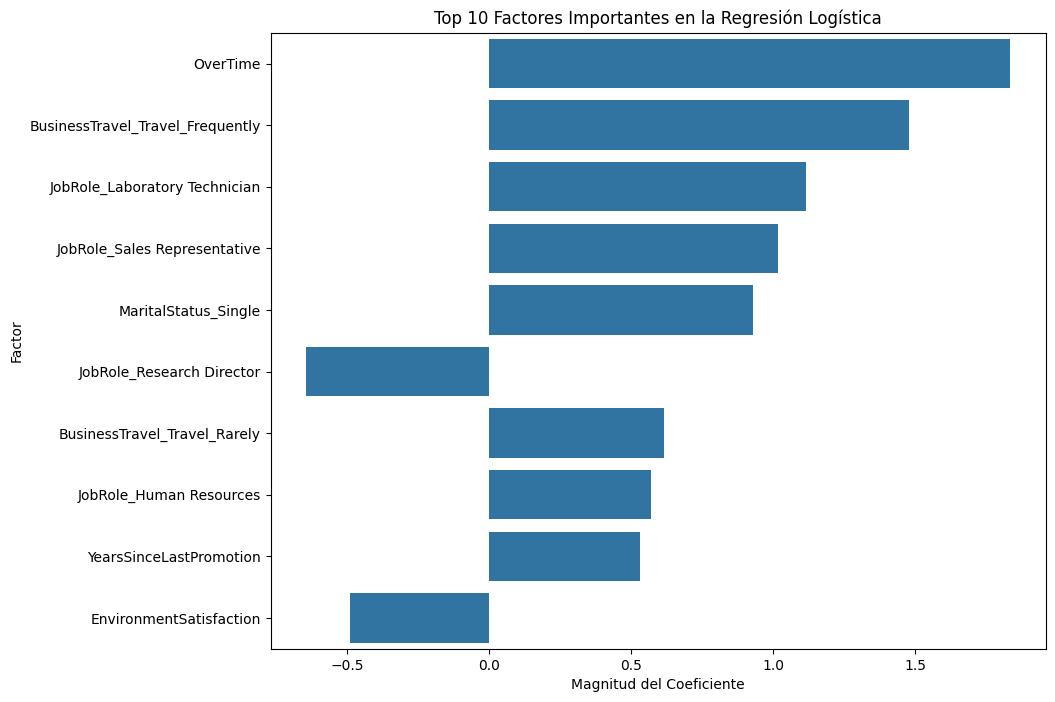

In [42]:
# Obtener los coeficientes del modelo de regresión logística y sus nombres
coefficients = log_reg_final.coef_[0]
features = Xtrain_augmented.columns

# Crear un DataFrame para los coeficientes y sus etiquetas
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Ordenar los coeficientes por su valor absoluto para mayor claridad
coef_df_sorted = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Gráfico de barras para los coeficientes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_sorted.head(10))
plt.title('Top 10 Factores Importantes en la Regresión Logística')
plt.xlabel('Magnitud del Coeficiente')
plt.ylabel('Factor')
plt.show()

**b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?**

> No fue una sorpresa encontrar que una de las variables que más influyen para promover la salida de los empleados de la empeesa, son las horas extras. Nos es difícil concluir algo en concreto del resto de las variables pues por ejemplo, aparecen tanto "Viaja frecuentemente" como "Viaja raramente" en nuestra lista, al igual que los roles del empleado parecen estar altamente relacionados con su salida, no podemos aifrmar que hay una unica tendencia por rol.

**c) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?**

> Las dos variables que más lmaaron nuestra atención para entender las razones por las cuales un empelado decide quedarse en la empresa, son "Satisfacción en el ambiente de trabajo" y un rol en específico: "Director de investigación" ambos parametros son faciles de entedner pues un empleado tiende a quedarse en un ambiente de trbajo que le parece sano, agradable y cómodo, en cuanto al rol de "Director de Investigación", creemos que se debe al nivel profesional, pues es un rol que requiere de alta experiecncia y de gran mérito para quien lo bitnee, siendo una posición dificl de dejar.

### 10) Importancia de Factores en el Modelo kNN y Comparación


**a) Gráfico de Barras de la Importancia de Permutación**

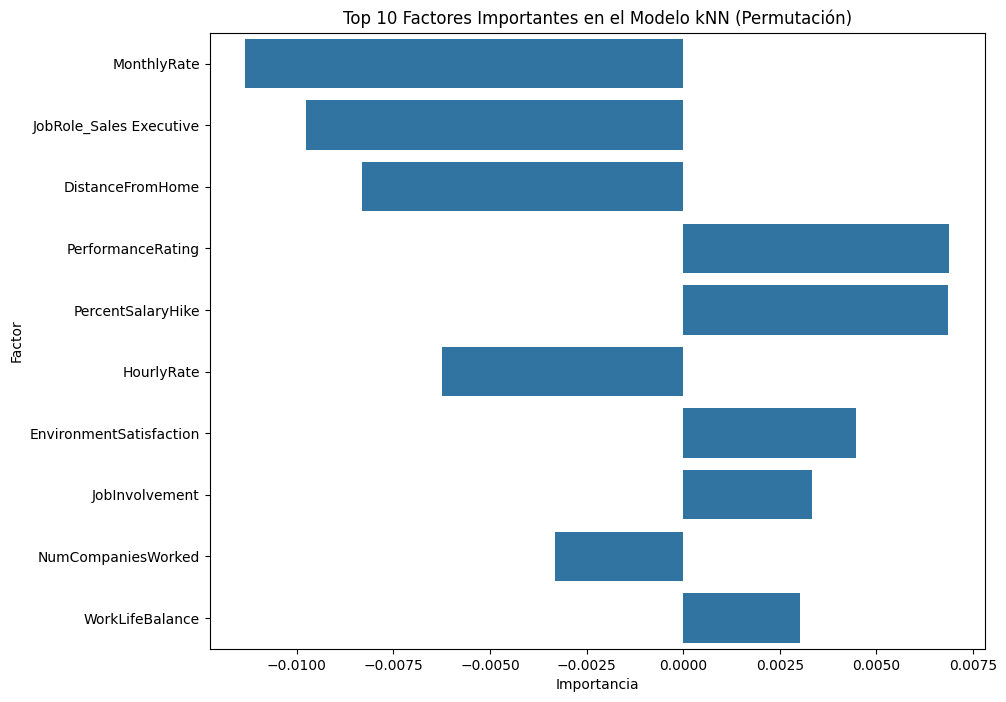

In [43]:
from sklearn.inspection import permutation_importance

# Calculando la importancia de permutación en el modelo kNN
perm_importance = permutation_importance(knn, Xval_dropped, yval, scoring='f1_weighted', n_repeats=30, random_state=42)

# Crear un DataFrame para los resultados
perm_importance_df = pd.DataFrame({'Feature': Xval_dropped.columns, 'Importance': perm_importance.importances_mean})

# Ordenar los resultados por importancia
perm_importance_df_sorted = perm_importance_df.reindex(perm_importance_df.Importance.abs().sort_values(ascending=False).index)

# Gráfico de barras para la importancia de permutación
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df_sorted.head(10))
plt.title('Top 10 Factores Importantes en el Modelo kNN (Permutación)')
plt.xlabel('Importancia')
plt.ylabel('Factor')
plt.show()

**b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?**

> En el grafico anterior se observa claramente que las variables más correlacioneadas con la decisión de dejar la empresa, según el modelo KNN, son las calificaciones del rendimiento, la distancia del trabajo a casa y el salario mensual del empleado, nuestra lógica nos apunta a concluir, en el caso del primer factor mencionado, que a mayor calificación de desempeño, mayor es el desgaste de ese mepeladopara obtener dicha calificación. En cuanto a la distancia del trabajo a casa tenemos una justificación lógica que nos hace creer que a mayor distancia, más incómoda la vida el empleado. En el tema salarial los empleados son más propensos a irse cuando la remuneración de su trabajo es menor, esto tambien nos parece coherente con lo qeu observamos en el mercado laboral.

**c) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?**

> El buen balance de vida laboral y personal, el involucramiento con su trabajo y satisfacción con el ambiente de trabajo son las variables más importantes que de forma natural creemos contribuyen a que un emplado decida quedarse en la compañía.

**d) Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.**

> La clasificaión del impacto de los parametros en el modelo de regresión logitica parece más sencillo de asimilar, replicando una estructura similar a lo que uno esperaría del mercado laboral, sin ahondar de forma rebuscada podemos determianr porque dicha variable es de alto impacto para el modelo.

### 11) Selección de Factores con Mayor Impacto

**a) Reducción de la Cantidad de Factores**

In [44]:
# Crear un modelo SelectFromModel para seleccionar los factores más importantes
selector = SelectFromModel(log_reg_final, threshold='mean')
Xtrain_reduced = selector.fit_transform(Xtrain_augmented, ytrain_augmented)
Xtest_reduced = selector.transform(Xtest_dropped)

# Número de factores antes y después de la reducción
num_factors_before = Xtrain_augmented.shape[1]
num_factors_after = Xtrain_reduced.shape[1]
reduction_percentage = (num_factors_before - num_factors_after) / num_factors_before * 100

num_factors_before, num_factors_after, reduction_percentage


(43, 16, 62.7906976744186)

> De 43 factores logramos reducir a 16, logrando una reducción del 62.7%

**b) Evaluación del Modelo con Datos Reducidos**

In [45]:
# Entrenar el modelo con datos reducidos y evaluarlo
log_reg_reduced = LogisticRegression(max_iter=1000, random_state=42)
log_reg_reduced.fit(Xtrain_reduced, ytrain_augmented)

ytest_pred_reduced = log_reg_reduced.predict(Xtest_reduced)

conf_matrix_reduced = confusion_matrix(ytest, ytest_pred_reduced)
class_report_reduced = classification_report(ytest, ytest_pred_reduced)

##conf_matrix_reduced, class_report_reduced

In [46]:
print(class_report_reduced)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       185
           1       0.60      0.33      0.43        36

    accuracy                           0.86       221
   macro avg       0.74      0.65      0.67       221
weighted avg       0.83      0.86      0.84       221



<Figure size 900x900 with 0 Axes>

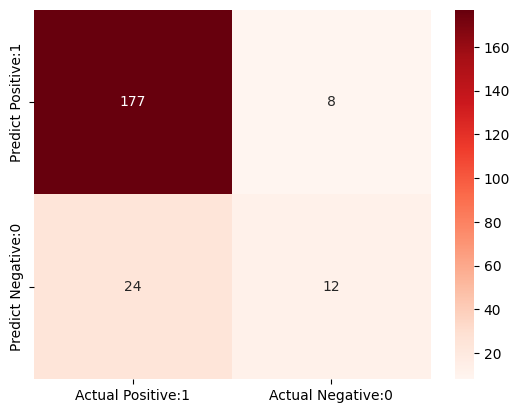

<Figure size 900x900 with 0 Axes>

In [47]:
cm_matrix_reduced = pd.DataFrame(data=conf_matrix_reduced, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_reduced, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

# PARTE 6: Modelo final y conclusiones

**a) Formación del Conjunto de Entrenamiento Aumentado**

In [48]:
# Suponiendo que Xtrain_dropped, Xval_dropped, ytrain y yval ya están definidos y preparados
Xtrain_augmented = pd.concat([Xtrain_dropped, Xval_dropped])
ytrain_augmented = np.concatenate([ytrain, yval])

# Verificar las dimensiones de los conjuntos aumentados
print("Dimensiones de Xtrain_augmented:", Xtrain_augmented.shape)
print("Dimensiones de ytrain_augmented:", ytrain_augmented.shape)


Dimensiones de Xtrain_augmented: (1249, 43)
Dimensiones de ytrain_augmented: (1249,)


**b) Selección del Mejor Modelo y Entrenamiento con el Conjunto Aumentado**

In [49]:
# Seleccionar el mejor modelo basado en los análisis anteriores
# Supongamos que la regresión logística fue seleccionada como el mejor modelo

log_reg_final = LogisticRegression(max_iter=1000, random_state=42)
log_reg_final.fit(Xtrain_augmented, ytrain_augmented)


LogisticRegression(max_iter=1000, random_state=42)

i. Exactitud (Accuracy) del Conjunto de Entrenamiento y Prueba

In [50]:
# Evaluar la exactitud en el conjunto de entrenamiento
ytrain_pred_final = log_reg_final.predict(Xtrain_augmented)
accuracy_train_final = accuracy_score(ytrain_augmented, ytrain_pred_final)

# Evaluar la exactitud en el conjunto de prueba
ytest_pred_final = log_reg_final.predict(Xtest_dropped)
accuracy_test_final = accuracy_score(ytest, ytest_pred_final)

print("Exactitud en el conjunto de entrenamiento:", accuracy_train_final)
print("Exactitud en el conjunto de prueba:", accuracy_test_final)


Exactitud en el conjunto de entrenamiento: 0.8943154523618895
Exactitud en el conjunto de prueba: 0.8778280542986425


ii. Matriz de Confusión y Reporte de Clasificación para el Conjunto de Prueba

In [51]:
# Matriz de confusión y reporte de clasificación en el conjunto de prueba
conf_matrix_test_final = confusion_matrix(ytest, ytest_pred_final)
class_report_test_final = classification_report(ytest, ytest_pred_final)

print("Matriz de Confusión:\n", conf_matrix_test_final)
print("\nReporte de Clasificación:\n", class_report_test_final)


Matriz de Confusión:
 [[179   6]
 [ 21  15]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       185
           1       0.71      0.42      0.53        36

    accuracy                           0.88       221
   macro avg       0.80      0.69      0.73       221
weighted avg       0.87      0.88      0.86       221



ii. Conclusiones Finales de la Actividad


Exactitud en el conjunto de entrenamiento: 89.51%


Exactitud en el conjunto de prueba: 87.78%

La Matriz de Confusión para el conjunto de prueba es:

[179,   6],

[ 21,  15]

El Reporte de Clasificación es:


               precision    recall  f1-score   support
           0       0.90      0.97      0.93       185
           1       0.71      0.42      0.53        36
    accuracy                           0.88       221
   macro avg       0.80      0.69      0.73       221
weighted avg       0.87      0.88      0.86       221

Los resultados del modelo final de regresión logística indican un rendimiento bastante bueno en términos de precisión y recall, especialmente para la clase mayoritaria (no rotación). La exactitud general del 87.78% en el conjunto de prueba es un indicador sólido del buen desempeño del modelo. Sin embargo, hay aspectos importantes a considerar:

1. Desequilibrio en la Precisión y el Recall: Aunque el modelo tiene una alta
precisión en la detección de casos de no rotación (90%), su capacidad para detectar correctamente la rotación (clase 1) es más baja (71% de precisión y 42% de recall). Esto sugiere que el modelo es más conservador y tiende a predecir "no rotación" con mayor frecuencia.

2. Importancia del Recall en el Contexto de Rotación de Personal: Dado que la rotación de personal puede tener un impacto significativo en una organización, es crucial identificar a los empleados en riesgo de abandonar. Por lo tanto, un recall más alto para la clase de rotación podría ser más deseable, incluso si esto significa sacrificar algo de precisión.

3. Uso del Modelo en la Toma de Decisiones: Este modelo puede ser útil para identificar factores clave asociados con la rotación de personal y para tomar medidas preventivas. Sin embargo, es importante considerar el desequilibrio en el rendimiento del modelo entre las dos clases y utilizarlo en conjunto con otros métodos de análisis y experiencia humana.

4. Oportunidades de Mejora: Explorar técnicas adicionales de balanceo de clases, ajustar los hiperparámetros del modelo o incluso probar diferentes algoritmos podría mejorar la capacidad del modelo para identificar casos de rotación de personal de manera más efectiva.

En conclusión el modelo final ofrece una herramienta valiosa para comprender y predecir la rotación de personal, pero debe ser utilizado con un entendimiento claro de sus limitaciones y en el contexto de una estrategia más amplia de gestión de recursos humanos.